#### Librerias para el manejo de datos 

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#### Cargo el Dataset

In [4]:
# Cargar el dataset
dataset= pd.read_csv("churn_dataset.csv")

#### Muestro las primeras 5 lineas

In [5]:
dataset.sample(5)

,CustomerID,Age,MonthlySpend,Tenure,CustomerServiceInteractions,DiscountsReceived,CustomerSatisfactionScore,Churn
311,C0312,65,371,26,0,28,7,0
841,C0842,64,150,28,0,31,8,0
642,C0643,21,487,3,14,22,10,0
493,C0494,48,469,11,14,49,2,1
731,C0732,42,91,3,9,11,1,1


#### Cantidad de filas y columnas

In [6]:
dataset.shape

(1000, 8)

#### Columnas, no nulos y tipos de datos

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CustomerID                   1000 non-null   object
 1   Age                          1000 non-null   int64 
 2   MonthlySpend                 1000 non-null   int64 
 3   Tenure                       1000 non-null   int64 
 4   CustomerServiceInteractions  1000 non-null   int64 
 5   DiscountsReceived            1000 non-null   int64 
 6   CustomerSatisfactionScore    1000 non-null   int64 
 7   Churn                        1000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


### EDA: Graficos

#### Histograma de Edad, de Gasto Mensual, de Antiguedad, Satisfaccion del Cliente

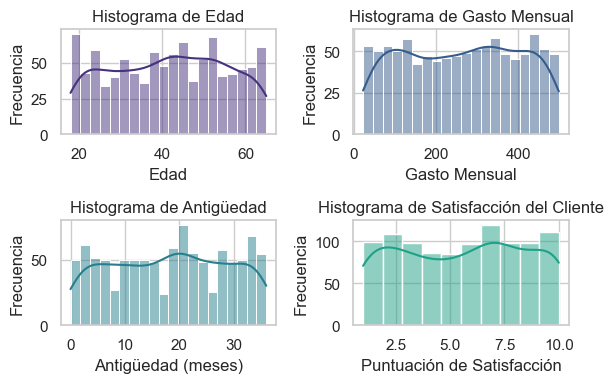

In [11]:
# Configuración de los estilos de los gráficos
sns.set(style="whitegrid")

# Crear una figura con subgráficos para los histogramas
fig, axs = plt.subplots(2, 2, figsize=(6, 4))

# Histograma de Edad
sns.histplot(dataset['Age'], bins=20, kde=True, ax=axs[0, 0], color=sns.color_palette("viridis")[0])
axs[0, 0].set_title('Histograma de Edad')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Frecuencia')

# Histograma de Gasto Mensual
sns.histplot(dataset['MonthlySpend'], bins=20, kde=True, ax=axs[0, 1], color=sns.color_palette("viridis")[1])
axs[0, 1].set_title('Histograma de Gasto Mensual')
axs[0, 1].set_xlabel('Gasto Mensual')
axs[0, 1].set_ylabel('Frecuencia')

# Histograma de Antigüedad
sns.histplot(dataset['Tenure'], bins=20, kde=True, ax=axs[1, 0], color=sns.color_palette("viridis")[2])
axs[1, 0].set_title('Histograma de Antigüedad')
axs[1, 0].set_xlabel('Antigüedad (meses)')
axs[1, 0].set_ylabel('Frecuencia')

# Histograma de Satisfacción del Cliente
sns.histplot(dataset['CustomerSatisfactionScore'], bins=10, kde=True, ax=axs[1, 1], color=sns.color_palette("viridis")[3])
axs[1, 1].set_title('Histograma de Satisfacción del Cliente')
axs[1, 1].set_xlabel('Puntuación de Satisfacción')
axs[1, 1].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()


#### Clientes que abandonaron y que no abandonaron

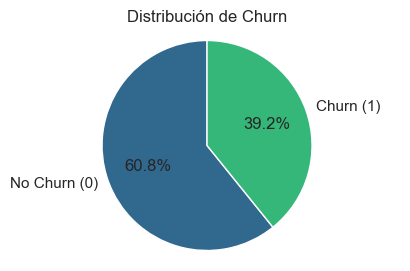

In [17]:
# Gráfico de torta para la variable Churn
plt.figure(figsize=(5, 3))
churn_counts = dataset['Churn'].value_counts()
plt.pie(churn_counts, labels=['No Churn (0)', 'Churn (1)'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", 2))
plt.title('Distribución de Churn')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

#### Analisis Bivariado: BoxPlot



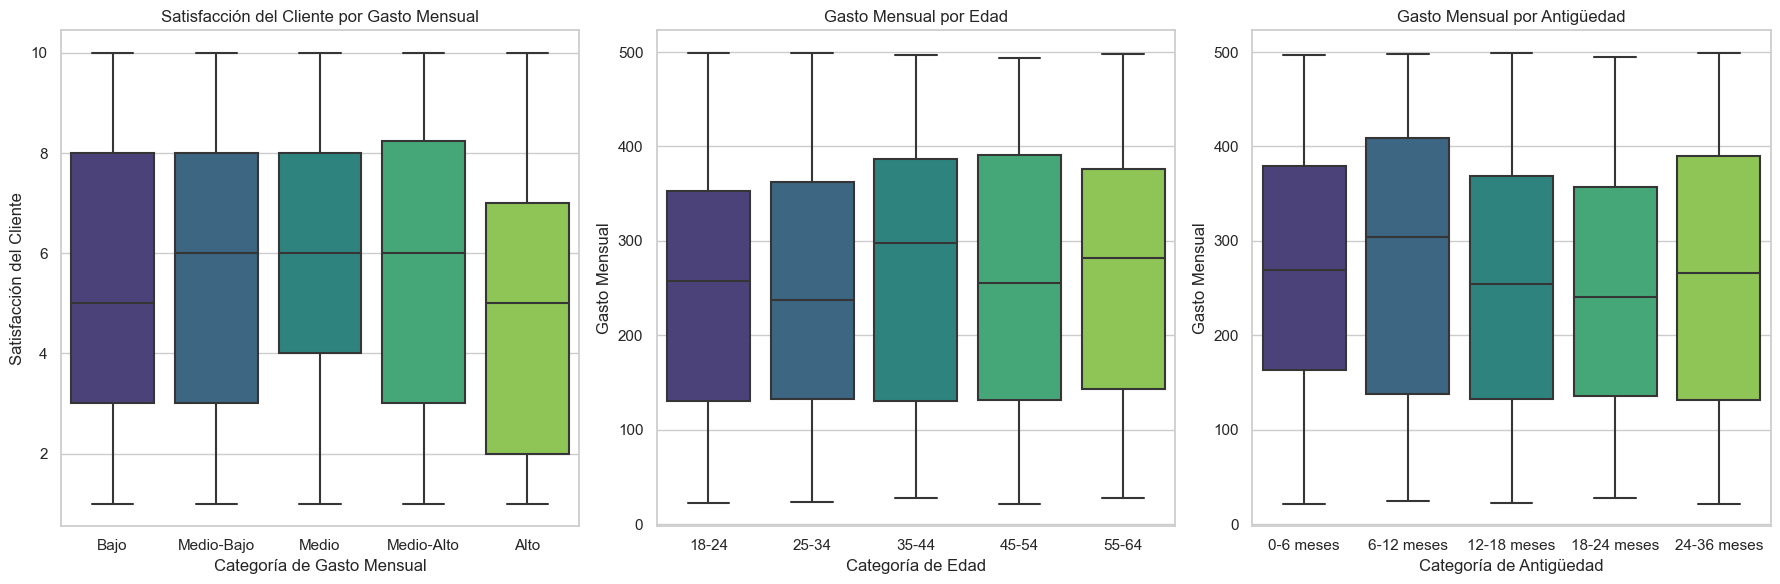

In [14]:
# Crear categorías para Gasto Mensual
dataset['SpendCategory'] = pd.cut(dataset['MonthlySpend'], bins=[0, 50, 100, 150, 200, 250], 
                                    labels=['Bajo', 'Medio-Bajo', 'Medio', 'Medio-Alto', 'Alto'])

# Crear categorías para Edad
dataset['AgeCategory'] = pd.cut(dataset['Age'], bins=[18, 25, 35, 45, 55, 65], 
                                  labels=['18-24', '25-34', '35-44', '45-54', '55-64'])

# Crear categorías para Antigüedad
dataset['TenureCategory'] = pd.cut(dataset['Tenure'], bins=[0, 6, 12, 18, 24, 36], 
                                     labels=['0-6 meses', '6-12 meses', '12-18 meses', '18-24 meses', '24-36 meses'])

# Configurar la figura con subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot para Gasto Mensual vs Satisfacción del Cliente
sns.boxplot(x='SpendCategory', y='CustomerSatisfactionScore', data=dataset, palette='viridis', ax=axs[0])
axs[0].set_title('Satisfacción del Cliente por Gasto Mensual')
axs[0].set_xlabel('Categoría de Gasto Mensual')
axs[0].set_ylabel('Satisfacción del Cliente')

# Boxplot para Edad vs Gasto Mensual
sns.boxplot(x='AgeCategory', y='MonthlySpend', data=dataset, palette='viridis', ax=axs[1])
axs[1].set_title('Gasto Mensual por Edad')
axs[1].set_xlabel('Categoría de Edad')
axs[1].set_ylabel('Gasto Mensual')

# Boxplot para Antigüedad vs Gasto Mensual
sns.boxplot(x='TenureCategory', y='MonthlySpend', data=dataset, palette='viridis', ax=axs[2])
axs[2].set_title('Gasto Mensual por Antigüedad')
axs[2].set_xlabel('Categoría de Antigüedad')
axs[2].set_ylabel('Gasto Mensual')

# Ajustar la disposición
plt.tight_layout()
plt.show()

### Análisis con el modelo K-means

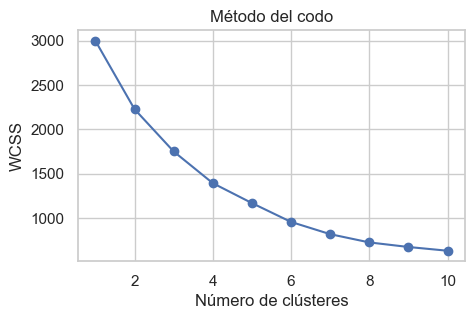

In [20]:
# Seleccionar características para K-Means
X = dataset[['MonthlySpend', 'Tenure', 'CustomerSatisfactionScore']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar el número óptimo de clústeres
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.show()


#### K-Means: Visualización de los clústeres

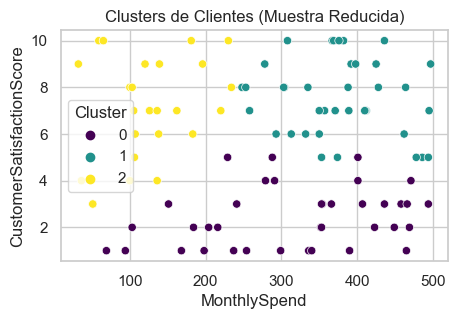

In [21]:
# Aplicar K-Means con el número óptimo de clústeres (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)

# Seleccionar una muestra del 10% de los datos para graficar
sample_data = dataset.sample(frac=0.1, random_state=42)

# Visualización de los clústeres con la muestra reducida
plt.figure(figsize=(5, 3))
sns.scatterplot(data=sample_data, x='MonthlySpend', y='CustomerSatisfactionScore', hue='Cluster', palette='viridis')
plt.title('Clusters de Clientes (Muestra Reducida)')
plt.show()

##### El análisis de K-means reveló tres grupos distintos de clientes:
- Clientes con bajo gasto y baja satisfacción (Cluster morado)
- Clientes con alto gasto y alta satisfacción (Cluster verde)
- Clientes con gasto medio (Cluster amarillo)

##### Este análisis proporciona información adicional más allá de la predicción de churn. 
Al identificar segmentos específicos de clientes, se pueden diseñar estrategias de retención personalizadas:
- Los clientes de bajo gasto y baja satisfacción pueden beneficiarse de incentivos o programas de fidelización.
- Los clientes de alto gasto y alta satisfacción representan el grupo más valioso; se debe priorizar su retención.
- Los clientes de gasto medio podrían ser un objetivo para programas de mejora de satisfacción, aumentando su potencial de gasto.

El K-means permite conocer el perfil de los clientes.
Esto nos da una oportunidad para implementar estrategias de retención específicas para cada segmento.

### Preprocesado de Datos


In [23]:
# Crear categorías para Gasto Mensual, Edad y Antigüedad
dataset['SpendCategory'] = pd.cut(dataset['MonthlySpend'], bins=[0, 50, 100, 150, 200, 250], labels=['Bajo', 'Medio-Bajo', 'Medio', 'Medio-Alto', 'Alto'])
dataset['AgeCategory'] = pd.cut(dataset['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-24', '25-34', '35-44', '45-54', '55-64'])
dataset['TenureCategory'] = pd.cut(dataset['Tenure'], bins=[0, 6, 12, 18, 24, 36], labels=['0-6 meses', '6-12 meses', '12-18 meses', '18-24 meses', '24-36 meses'])

# Convertir categorías en variables dummy
dataset = pd.get_dummies(dataset, columns=['SpendCategory', 'AgeCategory', 'TenureCategory'], drop_first=True)

# Preparar conjuntos de datos para el modelo
X = dataset.drop(['Churn', 'CustomerID', 'CustomerSatisfactionScore'], axis=1)
y = dataset['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos y entrenar el modelo de regresión logística
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)
model = LogisticRegression().fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


#### Matriz de confusion

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       125
           1       0.92      0.81      0.87        75

    accuracy                           0.91       200
   macro avg       0.91      0.89      0.90       200
weighted avg       0.91      0.91      0.90       200

[[120   5]
 [ 14  61]]


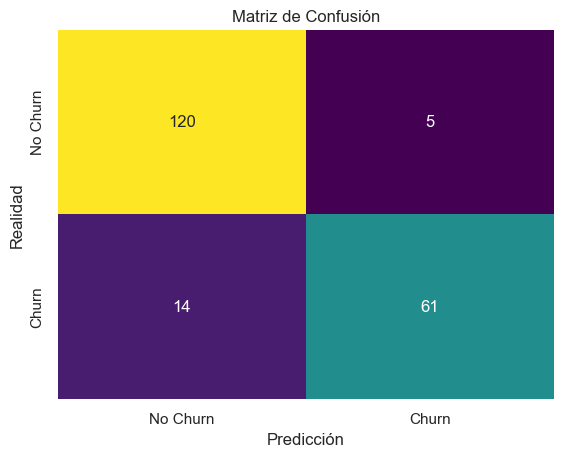

In [24]:
# Resultados del modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Graficar la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

#### Funcion Sigmoide

In [ ]:
# Graficar la función sigmoide de probabilidad de churn respecto a Gasto Mensual
spend_range = np.linspace(0, 250, 300).reshape(-1, 1)
spend_range_scaled = scaler.transform(np.concatenate([spend_range, np.zeros((spend_range.shape[0], X.shape[1] - 1))], axis=1))
plt.plot(spend_range, model.predict_proba(spend_range_scaled)[:, 1], color='blue', label='Probabilidad de Churn')
plt.axhline(0.5, color='red', linestyle='--', label='Umbral de Churn (0.5)')
plt.title('Función Sigmoide de la Probabilidad de Churn')
plt.xlabel('Gasto Mensual')
plt.ylabel('Probabilidad de Churn')
plt.legend()
plt.show()


#### Prediccion con un nuevo cliente

In [33]:
# Función de predicción de churn para un nuevo cliente
def predict_churn(new_customer):
    new_customer_df = pd.DataFrame([new_customer]).reindex(columns=X.columns, fill_value=0)
    return "Sí" if model.predict(scaler.transform(new_customer_df))[0] == 1 else "No"

# Ejemplo de uso
nuevo_cliente = {'Age': 30, 
                 'MonthlySpend': 120, 
                 'Tenure': 12, 
                 'DiscountsReceived': 1, 
                 'SpendCategory': 'Medio', 
                 'AgeCategory': '25-34', 
                 'TenureCategory': '6-12 meses'}

print(f"¿El nuevo cliente abandonará? {predict_churn(nuevo_cliente)}")

¿El nuevo cliente abandonará? Sí


#### Proyecto Fuga de Clientes

In [34]:
print("Comenze el 25 de Octubre del 2024")
print("Termine el 4 de Noviembre del 2024")

print("Enzo Gonzales")

Comenze el 25 de Octubre del 2024
Termine el 4 de Noviembre del 2024
Enzo Gonzales
